In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Task 1: Data Preparation

In [2]:
# Load datasets
c_df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\OneDrive\\Desktop\\Predicting Loan Default\\customer_financial_data.csv")

In [3]:
# Display the first few rows of each dataset
print("Customer Financial Data:")
c_df.head()

Customer Financial Data:


,Customer_ID,Name,Age,Gender,Annual_Income,Credit_Score,Total_Debt,Employment_Status
0,C00000001,David Taylor,56,Male,133324.57,409,46843.40,Unemployed
1,C00000002,Edward Grant,69,Male,161664.22,771,34325.10,Unemployed
2,C00000003,Robert Mosley,46,Male,41999.98,696,45115.08,Unemployed
3,C00000004,Emily Cunningham,32,Male,125164.68,657,13464.71,Self-Employed
4,C00000005,Mr. Jorge Gordon,60,Male,35377.38,811,35849.70,Self-Employed


In [4]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        50000 non-null  object 
 1   Name               50000 non-null  object 
 2   Age                50000 non-null  int64  
 3   Gender             50000 non-null  object 
 4   Annual_Income      50000 non-null  float64
 5   Credit_Score       50000 non-null  int64  
 6   Total_Debt         50000 non-null  float64
 7   Employment_Status  50000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [5]:
# Duplicate data 
c_df.duplicated().sum()

0

In [6]:
# Loading 2nd Dataset
l_df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\OneDrive\\Desktop\\Predicting Loan Default\\loan_information_data.csv")

In [7]:
print("\nLoan Information Data:")
l_df.head()


Loan Information Data:


,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Loan_Start_Date
0,L00000001,C00026785,40594.38,13.93,60 months,2024-06-04
1,L00000002,C00011497,38966.87,5.90,12 months,2023-09-02
2,L00000003,C00007333,29180.92,8.56,60 months,2020-08-08
3,L00000004,C00021003,31714.71,9.48,48 months,2024-06-17
4,L00000005,C00026374,19542.04,12.19,24 months,2022-10-03


In [8]:
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Loan_ID          100000 non-null  object 
 1   Customer_ID      100000 non-null  object 
 2   Loan_Amount      100000 non-null  float64
 3   Interest_Rate    100000 non-null  float64
 4   Loan_Term        100000 non-null  object 
 5   Loan_Start_Date  100000 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.6+ MB


In [9]:
l_df['Loan_Start_Date'] = pd.to_datetime(l_df['Loan_Start_Date'], errors='coerce').dt.date

In [10]:
l_df['Loan_Term'] = l_df['Loan_Term'].str.extract('(\d+)').astype(int)

In [11]:
# Duplicate data 
l_df.duplicated().sum()

0

In [12]:
l_df.head()

,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Loan_Start_Date
0,L00000001,C00026785,40594.38,13.93,60,2024-06-04
1,L00000002,C00011497,38966.87,5.90,12,2023-09-02
2,L00000003,C00007333,29180.92,8.56,60,2020-08-08
3,L00000004,C00021003,31714.71,9.48,48,2024-06-17
4,L00000005,C00026374,19542.04,12.19,24,2022-10-03


In [13]:
# Loading 3rd Dataset
d_df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\OneDrive\\Desktop\\Predicting Loan Default\\historical_default_data.csv")

In [14]:
print("\nHistorical Default Data:")
d_df.head()


Historical Default Data:


,Loan_ID,Default
0,L00000001,0
1,L00000002,0
2,L00000003,0
3,L00000004,0
4,L00000005,0


In [15]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Loan_ID  100000 non-null  object
 1   Default  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [16]:
# Duplicate data 
d_df.duplicated().sum()

0

Task 2: Data Merging

In [17]:
# Merge customer financial data with loan information data on Customer_ID then with historical default data on Loan_ID
merged_df = pd.merge(c_df, l_df, on='Customer_ID', how='inner')

df = pd.merge(merged_df, d_df, on='Loan_ID', how='inner')

# final data set
df.head()

,Customer_ID,Name,Age,Gender,Annual_Income,Credit_Score,Total_Debt,Employment_Status,Loan_ID,Loan_Amount,Interest_Rate,Loan_Term,Loan_Start_Date,Default
0,C00000001,David Taylor,56,Male,133324.57,409,46843.4,Unemployed,L00008450,13609.97,13.06,12,2023-07-04,0
1,C00000001,David Taylor,56,Male,133324.57,409,46843.4,Unemployed,L00044202,10452.72,12.94,36,2023-01-17,0
2,C00000002,Edward Grant,69,Male,161664.22,771,34325.1,Unemployed,L00029698,12467.19,14.23,24,2020-11-17,0
3,C00000002,Edward Grant,69,Male,161664.22,771,34325.1,Unemployed,L00054533,11949.17,8.99,24,2021-12-23,0
4,C00000002,Edward Grant,69,Male,161664.22,771,34325.1,Unemployed,L00055949,16229.21,4.65,60,2020-11-15,0


Task 3: Exploratory Data Analysis (EDA)

In [18]:
df[['Annual_Income', 'Credit_Score', 'Total_Debt', 'Loan_Amount', 'Interest_Rate', 'Loan_Term']].describe()

,Annual_Income,Credit_Score,Total_Debt,Loan_Amount,Interest_Rate,Loan_Term
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,110037.548326,573.315240,25008.851460,25463.415150,8.757237,35.993520
std,51932.949696,159.160983,14440.521643,14140.155291,3.602871,16.975482
min,20001.520000,300.000000,0.240000,1000.110000,2.500000,12.000000
25%,64641.622500,434.000000,12454.260000,13205.845000,5.640000,24.000000
50%,110469.230000,573.000000,24989.530000,25439.710000,8.780000,36.000000
75%,155140.490000,712.000000,37468.600000,37713.075000,11.860000,48.000000
max,199998.570000,849.000000,49999.150000,49999.740000,15.000000,60.000000


In [19]:
# Loan Default Distribution:
df['Default'].value_counts(normalize=True)

Default
0    0.85083
1    0.14917
Name: proportion, dtype: float64

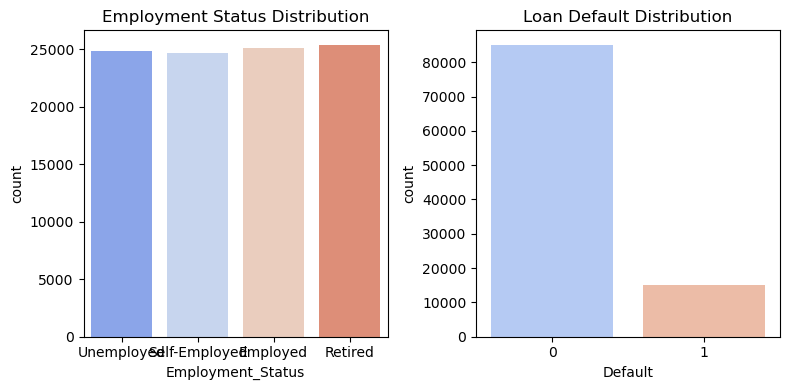

In [20]:
# Plot distribution of categorical features like Employment_Status and Default
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Employment_Status', data=df, palette='coolwarm')
plt.title('Employment Status Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Default', data=df, palette='coolwarm')
plt.title('Loan Default Distribution')

plt.tight_layout()
plt.show()


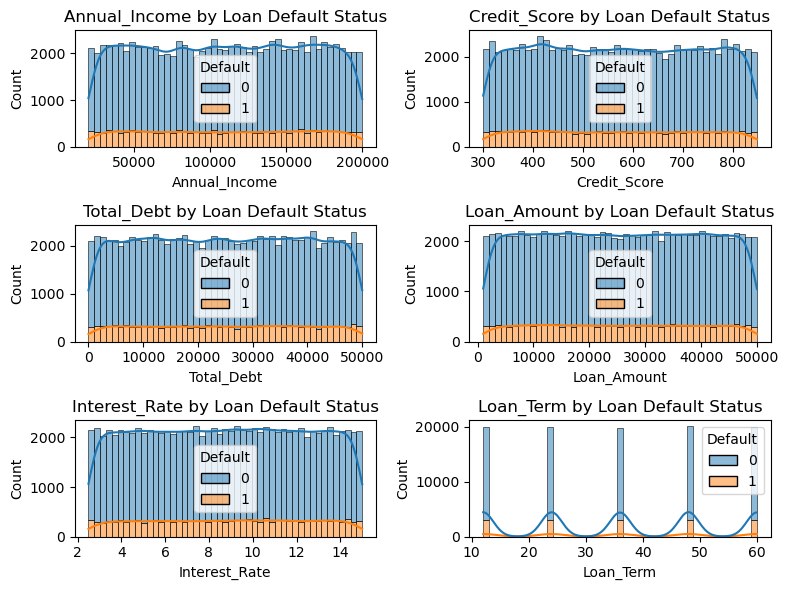

In [21]:
# Compare distributions of key features between default and non-default loans
n_features = ['Annual_Income', 'Credit_Score', 'Total_Debt', 'Loan_Amount', 'Interest_Rate', 'Loan_Term']
plt.figure(figsize=(8, 6))
for i, feature in enumerate(n_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue='Default', kde=True, multiple='stack')
    plt.title(f'{feature} by Loan Default Status')
plt.tight_layout()
plt.show()


In [22]:
c_matrix = df[['Annual_Income', 'Credit_Score', 'Total_Debt', 'Loan_Amount', 'Interest_Rate', 'Loan_Term', 'Default']].corr()
c_matrix

,Annual_Income,Credit_Score,Total_Debt,Loan_Amount,Interest_Rate,Loan_Term,Default
Annual_Income,1.000000,-0.006280,0.002991,-0.001787,0.004690,0.001745,0.001061
Credit_Score,-0.006280,1.000000,-0.003010,0.000909,0.000342,-0.002185,-0.004635
Total_Debt,0.002991,-0.003010,1.000000,0.000142,-0.001052,-0.001263,0.002291
Loan_Amount,-0.001787,0.000909,0.000142,1.000000,0.004055,0.001095,-0.001824
Interest_Rate,0.004690,0.000342,-0.001052,0.004055,1.000000,-0.001498,0.004065
Loan_Term,0.001745,-0.002185,-0.001263,0.001095,-0.001498,1.000000,0.001846
Default,0.001061,-0.004635,0.002291,-0.001824,0.004065,0.001846,1.000000


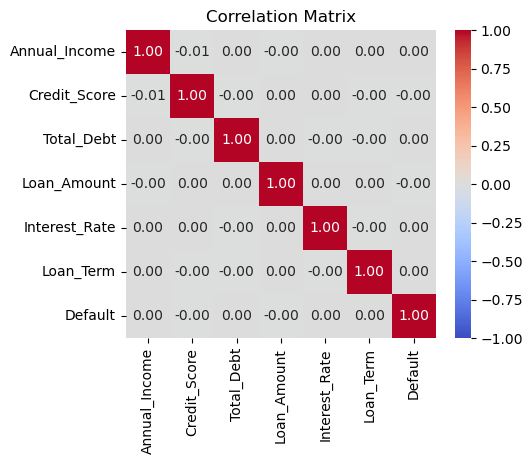

In [23]:
plt.figure(figsize=(5, 4))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Task 4.1: Create New Features

- Debt-to-Income Ratio: This measures the ratio of total debt to annual income.
- Average Loan Amount per Customer: This will help identify customers who consistently take higher loans.
- Loan-to-Income Ratio: This measures the ratio of the loan amount to the annual income.

In [24]:
df['Debt_to_Income_Ratio'] = round(df['Total_Debt'] / df['Annual_Income'],2)

In [25]:
df['Avg_Loan_Amount'] = round(df.groupby('Customer_ID')['Loan_Amount'].transform('mean'),2)

In [26]:
df['Loan_to_Income_Ratio'] = round(df['Loan_Amount'] / df['Annual_Income'],2)

In [27]:
columns_to_remove = ['Customer_ID', 'Name', 'Age', 'Gender', 'Loan_ID', 'Loan_Start_Date']
df = df.drop(columns=columns_to_remove)

Task 4.2: Encode Categorical Variables and Normalize Numerical Features

In [28]:
employment_status_mapping = {
    'Unemployed': 0,
    'Self-Employed': 2,
    'Employed': 3,
    'Retired' : 1
}
df['Employment_Status'] = df['Employment_Status'].map(employment_status_mapping)

In [29]:
df.head()

,Annual_Income,Credit_Score,Total_Debt,Employment_Status,Loan_Amount,Interest_Rate,Loan_Term,Default,Debt_to_Income_Ratio,Avg_Loan_Amount,Loan_to_Income_Ratio
0,133324.57,409,46843.4,0,13609.97,13.06,12,0,0.35,12031.34,0.10
1,133324.57,409,46843.4,0,10452.72,12.94,36,0,0.35,12031.34,0.08
2,161664.22,771,34325.1,0,12467.19,14.23,24,0,0.21,13548.52,0.08
3,161664.22,771,34325.1,0,11949.17,8.99,24,0,0.21,13548.52,0.07
4,161664.22,771,34325.1,0,16229.21,4.65,60,0,0.21,13548.52,0.10


In [30]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Default",axis=1), df["Default"], test_size=0.2, random_state=42)

In [31]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [33]:
X_train_p = pca.fit_transform(X_train_scaled)
X_test_p = pca.transform(X_test_scaled)

In [34]:
X_train_p

array([[-0.513621  ,  2.68114107, -0.35795727],
       [ 0.45579347, -0.86792695,  0.74674521],
       [ 0.67221968,  0.3669658 , -1.11733456],
       ...,
       [-0.84045682, -0.10375771,  1.50612036],
       [-0.13867972,  0.87358655,  0.51191726],
       [-2.23167977, -0.32043741,  0.76739641]])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [36]:
log_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [37]:
log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=log_param, cv=5, scoring='f1', n_jobs=-1)
log_reg.fit(X_train_p, y_train)  

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='f1')

In [38]:
# # Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# Logistic Regression
# log_reg = LogisticRegression()
# log_reg.fit(X_train_p, y_train)class_weight={0: 2, 1: 1}

In [39]:
deci_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50]
}

In [40]:
decision_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=deci_param, cv=5, scoring='f1', n_jobs=-1)
decision_tree.fit(X_train_p,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [41]:
# Decision Tree
# decision_tree = DecisionTreeClassifier(random_state=42)
# decision_tree.fit(X_train_p, y_train)

In [42]:
ran_forest = RandomForestClassifier(n_estimators=200)
ran_forest.fit(X_train_p, y_train)

RandomForestClassifier(n_estimators=200)

In [43]:
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': ran_forest
}

In [44]:
metrics_list = []

# Model Evaluation
for model_name, model in models.items():
    # Check if the model is Logistic Regression to apply scaled data
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_test_p)
        y_pred_proba = model.predict_proba(X_test_p)[:, 1]
    else:
        y_pred = model.predict(X_test_p)
        y_pred_proba = model.predict_proba(X_test_p)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

metrics_list


[{'Model': 'Logistic Regression',
  'Accuracy': 0.5065,
  'Precision': 0.14728042109608835,
  'Recall': 0.4701812191103789,
  'F1-Score': 0.22430053442313738,
  'ROC-AUC': 0.49009923036623027},
 {'Model': 'Decision Tree',
  'Accuracy': 0.73465,
  'Precision': 0.1660787771898883,
  'Recall': 0.18616144975288304,
  'F1-Score': 0.17554761534876495,
  'ROC-AUC': 0.5094674033320854},
 {'Model': 'Random Forest',
  'Accuracy': 0.8462,
  'Precision': 0.09803921568627451,
  'Recall': 0.0016474464579901153,
  'F1-Score': 0.0032404406999351912,
  'ROC-AUC': 0.4986266909632245}]

In [45]:
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

# Select the best model based on the recall(true positive classification) or F1(balance of precision and recall), beacause if our model shows unbalanced datset.
best_model = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
print(best_model)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression   0.50650   0.147280  0.470181  0.224301  0.490099
1        Decision Tree   0.73465   0.166079  0.186161  0.175548  0.509467
2        Random Forest   0.84620   0.098039  0.001647  0.003240  0.498627
Model        Logistic Regression
Accuracy                  0.5065
Precision                0.14728
Recall                  0.470181
F1-Score                0.224301
ROC-AUC                 0.490099
Name: 0, dtype: object


In [46]:
# Best parameters and the best score
best_params = log_reg.best_params_
best_score = log_reg.best_score_
print(best_params)
print(best_score)

{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.22632587550253302


In [47]:
y_pred = log_reg.predict(X_test_p)
y_pred_proba = log_reg.predict_proba(X_test_p)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

print("Logistic Regression Performance:")
print(pd.DataFrame([metrics]))

Logistic Regression Performance:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression    0.5065    0.14728  0.470181  0.224301  0.490099


In [48]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8703, 8262],
       [1608, 1427]], dtype=int64)

<Axes: >

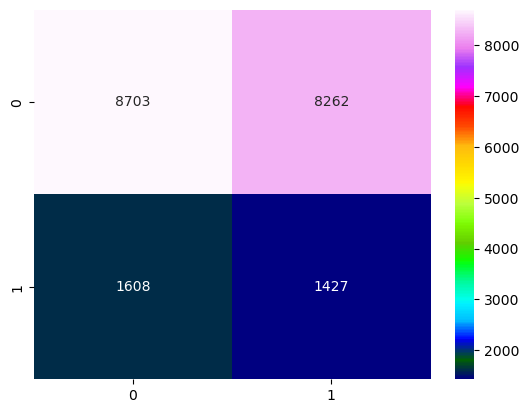

In [49]:
sns.heatmap(cm,annot=True,cmap="gist_ncar",fmt=".0f", cbar_kws={'format': '%.0f'})

### Loan Default Prediction Report

This report summarizes the analysis and model development for predicting loan defaults using various machine learning techniques.

#### Model Performance

Below is the comparison of model performance metrics:

In [50]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.50650,0.147280,0.470181,0.224301,0.490099
1,Decision Tree,0.73465,0.166079,0.186161,0.175548,0.509467
2,Random Forest,0.84620,0.098039,0.001647,0.003240,0.498627


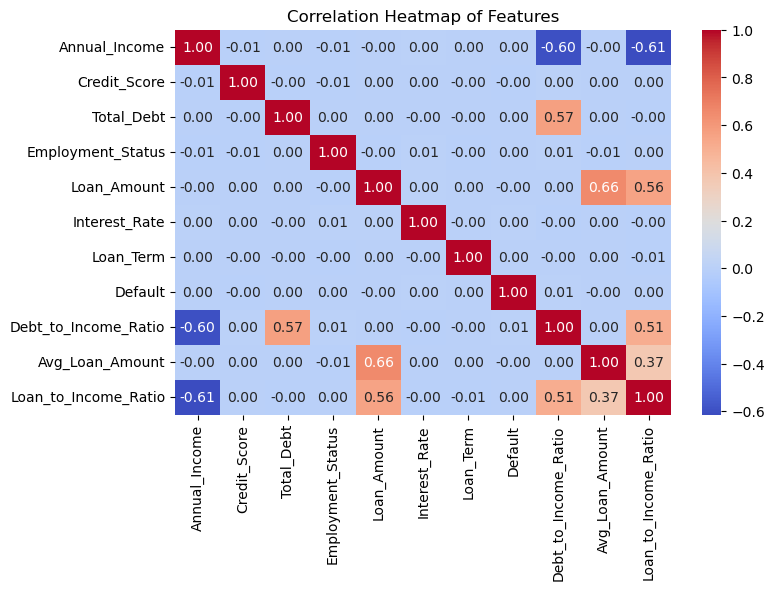

In [51]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


**Conclusion:**

The analysis identified the most impactful features on loan defaults and selected the best-performing model based on ROC-AUC. Further tuning and feature engineering could improve the model's predictive power.

In [52]:
best_model = log_reg.best_estimator_

In [53]:
print(type(best_model))

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [54]:
# Testing the model 
best_model.predict(pca.transform(scaler.transform([[72818.64, 629, 43831.69, 1, 5035.81, 11.22, 60, 0.60, 11781.55, 0.07,]])))

array([1], dtype=int64)

In [55]:
best_model.predict(pca.transform(scaler.transform([[86474.87, 575, 15076.60, 2, 39905.76, 13.57, 48, 0.17, 24709.76, 0.46]])))

array([0], dtype=int64)

In [56]:
X_train[:5]

,Annual_Income,Credit_Score,Total_Debt,Employment_Status,Loan_Amount,Interest_Rate,Loan_Term,Debt_to_Income_Ratio,Avg_Loan_Amount,Loan_to_Income_Ratio
75220,72818.64,629,43831.69,1,5035.81,11.22,60,0.60,11781.55,0.07
48955,86474.87,575,15076.60,2,39905.76,13.57,48,0.17,24709.76,0.46
44966,105280.43,704,45551.33,1,34205.89,2.74,60,0.43,25683.10,0.32
13568,21276.58,805,5270.88,3,34439.90,12.78,36,0.25,30507.12,1.62
92727,120971.12,692,8877.68,0,37195.24,2.88,36,0.07,28850.87,0.31


In [57]:
y_train[:5]

75220    1
48955    0
44966    0
13568    1
92727    0
Name: Default, dtype: int64